In [22]:
# !pip install sentence_transformers
from sentence_transformers import SentenceTransformer, util
import torch
import csv

# Load the pre-trained Sentence Transformer models
models = [
    SentenceTransformer("Sakil/sentence_similarity_semantic_search"),
    SentenceTransformer("sentence-transformers/all-mpnet-base-v2"),
    SentenceTransformer("sentence-transformers/multi-qa-MiniLM-L6-cos-v1"),
    SentenceTransformer("sentence-transformers/distiluse-base-multilingual-cased-v2"),
    SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
]

# Encode the query and passages
query = 'That is a happy person'
passages = ['That is happy dog', 'That is very happy person', 'Today is a sunny day']

results = []

for i, model in enumerate(models, start=1):
    model_name = f"M{i}"

    query_embedding = model.encode(query, convert_to_tensor=True)
    passage_embeddings = model.encode(passages, convert_to_tensor=True)

    # Normalize embeddings
    query_embedding /= query_embedding.norm(dim=-1, keepdim=True)
    passage_embeddings /= passage_embeddings.norm(dim=-1, keepdim=True)

    # Compute similarity scores using different metrics
    cosine_similarity_scores = util.pytorch_cos_sim(query_embedding, passage_embeddings)

    # Use unsqueeze to make the tensors 2D before computing distances
    euclidean_distances = torch.cdist(query_embedding.unsqueeze(0), passage_embeddings.unsqueeze(0), p=2)
    manhattan_distances = torch.cdist(query_embedding.unsqueeze(0), passage_embeddings.unsqueeze(0), p=1)
    minkowski_distances = torch.cdist(query_embedding.unsqueeze(0), passage_embeddings.unsqueeze(0), p=3)

    # Save only the max for cosine similarity and min for distances
    model_results = {
        "Model": model_name,
        "Cosine Similarity": max(cosine_similarity_scores[0].tolist()),
        "Euclidean Distance": euclidean_distances.min().item(),  # Extract the minimum value
        "Manhattan Distance": manhattan_distances.min().item(),  # Extract the minimum value
        "Minkowski Distance": minkowski_distances.min().item(),  # Extract the minimum value
    }

    # Extract the minimum and maximum values for scaling
    min_euclidean_distance = euclidean_distances.min().item()
    max_euclidean_distance = euclidean_distances.max().item()

    min_manhattan_distance = manhattan_distances.min().item()
    max_manhattan_distance = manhattan_distances.max().item()

    min_minkowski_distance = minkowski_distances.min().item()
    max_minkowski_distance = minkowski_distances.max().item()

    # Apply min-max scaling to the distances
    scaled_euclidean_distance = (euclidean_distances - min_euclidean_distance) / (max_euclidean_distance - min_euclidean_distance)
    scaled_manhattan_distance = (manhattan_distances - min_manhattan_distance) / (max_manhattan_distance - min_manhattan_distance)
    scaled_minkowski_distance = (minkowski_distances - min_minkowski_distance) / (max_minkowski_distance - min_minkowski_distance)

    # Create the scaled model_results dictionary
    scaled_model_results = {
      "Model": model_name,
      "Cosine Similarity": max(cosine_similarity_scores[0].tolist()),
      "Scaled Euclidean Distance": scaled_euclidean_distance.mean().item(),
      "Scaled Manhattan Distance": scaled_manhattan_distance.mean().item(),
      "Scaled Minkowski Distance": scaled_minkowski_distance.mean().item(),
    }

    results.append(scaled_model_results)

    # Save results to CSV
    csv_file_path = 'similarity_results.csv'
    with open(csv_file_path, 'w', newline='') as csv_file:
        fieldnames = ['Model', 'Cosine Similarity', 'Scaled Euclidean Distance', 'Scaled Manhattan Distance',
         'Scaled Minkowski Distance']
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        csv_writer.writeheader()
        csv_writer.writerows(results)

    print(f"Similarity scores for model {i} has been saved to {csv_file_path}")


tensor([[[0.6809, 0.2592, 0.8259]]])
Similarity scores for model 1 has been saved to similarity_results.csv
tensor([[[0.7071, 0.4499, 1.1707]]])
Similarity scores for model 2 has been saved to similarity_results.csv
tensor([[[0.8009, 0.3452, 1.2175]]])
Similarity scores for model 3 has been saved to similarity_results.csv
tensor([[[0.6976, 0.4121, 1.2232]]])
Similarity scores for model 4 has been saved to similarity_results.csv
tensor([[[0.8184, 0.4706, 1.2191]]])
Similarity scores for model 5 has been saved to similarity_results.csv


In [8]:
%pip install Topsis-Himanshu-102103568

In [25]:
from Topsis_Himanshu_102103568.topsis import topsis
inputFile="similarity_results.csv"
weights="1,1,1,1"
impacts="+,-,-,-"
resultFile="result_1.csv"
topsis(inputFile, weights, impacts, resultFile)

  Model  Cosine Similarity  Scaled Euclidean Distance  \
0    M1           0.966409                   0.581379   
1    M2           0.898781                   0.452293   
2    M3           0.940434                   0.507496   
3    M4           0.915098                   0.450659   
4    M5           0.889267                   0.488196   

   Scaled Manhattan Distance  Scaled Minkowski Distance  
0                   0.565843                   0.591381  
1                   0.457227                   0.449569  
2                   0.513766                   0.504964  
3                   0.437510                   0.466270  
4                   0.501074                   0.479805  
   Cosine Similarity  Scaled Euclidean Distance  Scaled Manhattan Distance  \
0           0.468537                   0.521768                   0.509030   
1           0.435749                   0.405917                   0.411319   
2           0.455943                   0.455460                   0.462181 

In [27]:
from Topsis_Himanshu_102103568.topsis import topsis
inputFile="similarity_results.csv"
weights="0.5,0.25,0.25,0.25"
impacts="+,-,-,-"
resultFile="result_2.csv"
topsis(inputFile, weights, impacts, resultFile)

  Model  Cosine Similarity  Scaled Euclidean Distance  \
0    M1           0.966409                   0.581379   
1    M2           0.898781                   0.452293   
2    M3           0.940434                   0.507496   
3    M4           0.915098                   0.450659   
4    M5           0.889267                   0.488196   

   Scaled Manhattan Distance  Scaled Minkowski Distance  
0                   0.565843                   0.591381  
1                   0.457227                   0.449569  
2                   0.513766                   0.504964  
3                   0.437510                   0.466270  
4                   0.501074                   0.479805  
   Cosine Similarity  Scaled Euclidean Distance  Scaled Manhattan Distance  \
0           0.234268                   0.130442                   0.127257   
1           0.217874                   0.101479                   0.102830   
2           0.227971                   0.113865                   0.115545 

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
csv_file_path = 'similarity_results.csv'
df = pd.read_csv(csv_file_path)

# Display basic statistics
print("Basic Statistics:")
print(df.describe())


Basic Statistics:
       Cosine Similarity  Scaled Euclidean Distance  \
count           5.000000                   5.000000   
mean            0.921998                   0.496005   
std             0.031505                   0.053500   
min             0.889267                   0.450659   
25%             0.898781                   0.452293   
50%             0.915098                   0.488196   
75%             0.940434                   0.507496   
max             0.966409                   0.581379   

       Scaled Manhattan Distance  Scaled Minkowski Distance  
count                   5.000000                   5.000000  
mean                    0.495084                   0.498398  
std                     0.050348                   0.055792  
min                     0.437510                   0.449569  
25%                     0.457227                   0.466270  
50%                     0.501074                   0.479805  
75%                     0.513766                   0

<ipython-input-36-278669d712c8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


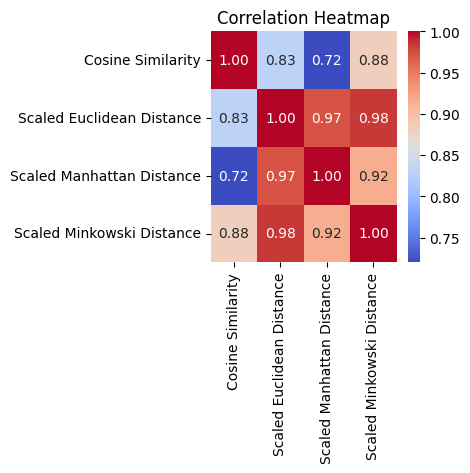

In [36]:
# Correlation Heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

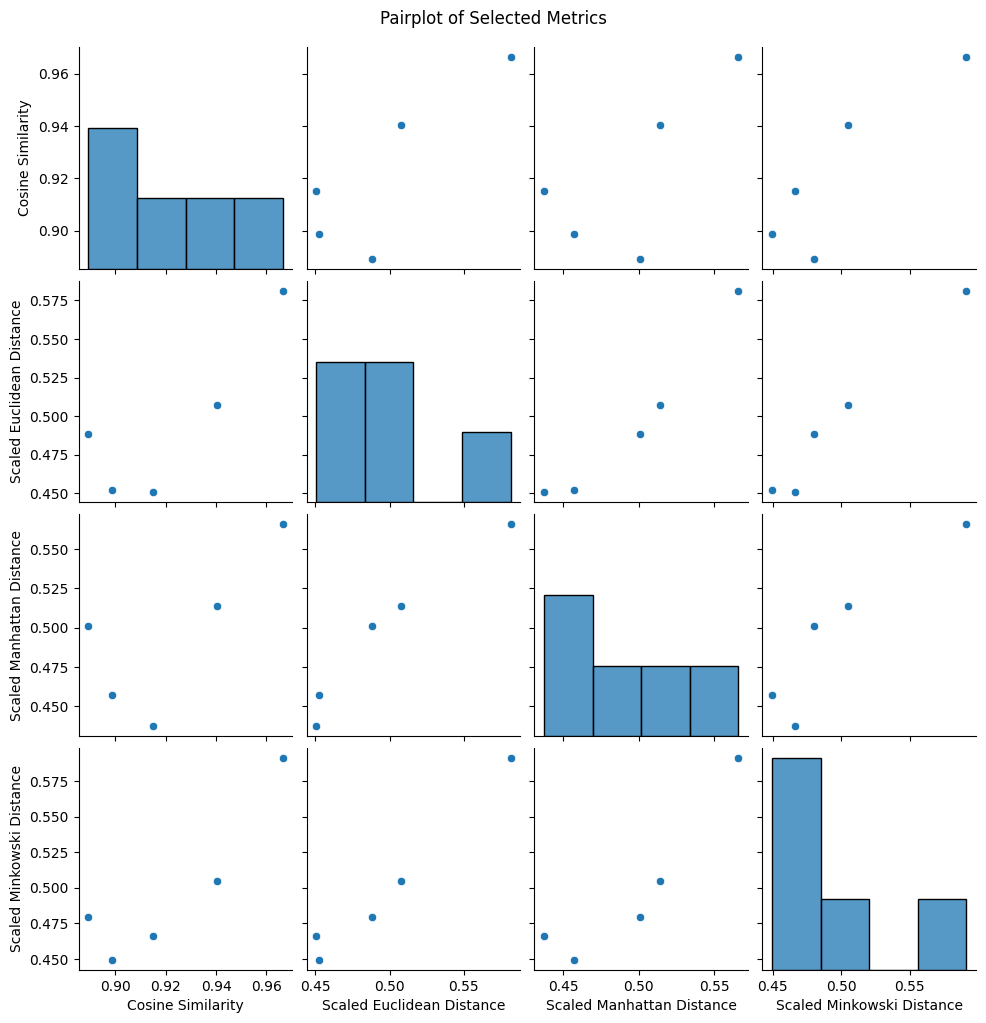

In [32]:
# Pairplot for selected columns
sns.pairplot(df[['Cosine Similarity', 'Scaled Euclidean Distance', 'Scaled Manhattan Distance', 'Scaled Minkowski Distance']])
plt.suptitle('Pairplot of Selected Metrics', y=1.02)
plt.show()